**Nom:** Luis Vera Albarca  
**NIU:** 1637397  

# **<span style="color:turquoise">CAS KAGGLE: VIDEOGAMES SALES WITH RATINGS</span>**

### **<span style="color:#EE82EE;">INTRODUCCIÓ A LA BASE DE DADES</span>**

<div style="text-align: justify;">
La base de dades "Video Game Sales with Ratings" de Kaggle recull informació detallada sobre les vendes de videojocs a nivell mundial, proporcionant dades sobre els videojocs més venuts i les seves valoracions. Aquesta base de dades permet explorar diverses variables relacionades amb la indústria dels videojocs i és una eina valuosa per a realitzar anàlisis de dades i visualitzacions. Algunes de les columnes més importants inclouen:

* <span style="color:#98FF98;">**Nom del joc:**</span> El títol del videojoc.
* <span style="color:#98FF98;">**Plataforma:**</span> La consola o dispositiu en què es va llançar el joc (per exemple, PlayStation, Xbox, Nintendo, PC, etc.).
* <span style="color:#98FF98;">**Plataforma:**</span> La consola o dispositiu en què es va llançar el joc (per exemple, PlayStation, Xbox, Nintendo, PC, etc.).
* <span style="color:#98FF98;">**Any de llançament:**</span> L'any en què el videojoc es va publicar per primera vegada.
* <span style="color:#98FF98;">**Gènere:**</span> El tipus de joc (acció, aventura, esports, etc.).
* <span style="color:#98FF98;">**Editorial:**</span> L'empresa responsable de la publicació del joc.
* <span style="color:#98FF98;">**Vendes globals:**</span> El nombre de còpies venudes arreu del món, expressat en milions.
* <span style="color:#98FF98;">**Valoracions:**</span> Les puntuacions assignades pel públic o per les crítiques especialitzades, com per exemple la valoració de Metacritic.

A més, la base de dades ofereix dades segmentades per regions específiques com Nortamèrica, Europa i Japó, permetent fer anàlisis regionals per comprendre les diferències en les preferències de videojocs a nivell global.
</div>





### **<span style="color:#EE82EE">IMPORTAR DATASET</span>**

In [154]:
#Carreguem el dataset a traves de kaggle
#En primer lloc importem la api

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

import os

In [155]:
#Seguidament, descarreguem el dataset


from zipfile import ZipFile
import time
dataser_owner = 'rush4ratio'
dataset_name= 'video-game-sales-with-ratings'
dataset = f'{dataser_owner}/{dataset_name}'

if not os.path.isdir('data'):
  os.mkdir('data')
api.dataset_download_files(dataset = dataset,path = 'data')
zf = ZipFile(f'data/{dataset_name}.zip')
zf.extractall(f'data/{dataset_name}') 
zf.close()

Dataset URL: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings


### **<span style="color:#EE82EE">IMPORTS</span>**

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### **<span style="color:#EE82EE">LECTURA DEL DATASET</span>**

In [ ]:
#Llegim el dataset i fem un print per fer-li una primera ullada

df = pd.read_csv(f'data/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### **<span style="color:#EE82EE">ANÀLISI DEL DATASET</span>**

En aquest apartat analitzarem els atributs del dataset i com es relacionen entre ells. 

In [158]:
#Quantitat d'atributs i llistat

def mostrar_atributs(df):

    print("Quantitat d'atributs: ",len(df.columns))
    print()

    print("Quantitat de mostres: ",len(df))
    print()

    info_dict = {
        col: {
            "Tipus de Dada": df[col].dtype,
            "Valors No Nuls": df[col].notnull().sum(),
            "Valors NaNs": df[col].isnull().sum(),
            "Percentatge NaNs (%)": (df[col].isnull().sum() / len(df) * 100)
        }
        for col in df.columns
    }
    
    # Mostrar el diccionari amb els resultats
    print("Anàlisi dels atributs del Dataset:")
    for atributo, info in info_dict.items():
        print(f"\nAtribut: {atributo}")
        for clave, valor in info.items():
            print(f"  {clave}: {valor}")
    
    # Retornar el diccionari amb la informació
    return info_dict

info_atributs = mostrar_atributs(df)



Quantitat d'atributs:  16

Quantitat de mostres:  16719

Anàlisi dels atributs del Dataset:

Atribut: Name
  Tipus de Dada: object
  Valors No Nuls: 16717
  Valors NaNs: 2
  Percentatge NaNs (%): 0.011962437944853162

Atribut: Platform
  Tipus de Dada: object
  Valors No Nuls: 16719
  Valors NaNs: 0
  Percentatge NaNs (%): 0.0

Atribut: Year_of_Release
  Tipus de Dada: float64
  Valors No Nuls: 16450
  Valors NaNs: 269
  Percentatge NaNs (%): 1.60894790358275

Atribut: Genre
  Tipus de Dada: object
  Valors No Nuls: 16717
  Valors NaNs: 2
  Percentatge NaNs (%): 0.011962437944853162

Atribut: Publisher
  Tipus de Dada: object
  Valors No Nuls: 16665
  Valors NaNs: 54
  Percentatge NaNs (%): 0.32298582451103536

Atribut: NA_Sales
  Tipus de Dada: float64
  Valors No Nuls: 16719
  Valors NaNs: 0
  Percentatge NaNs (%): 0.0

Atribut: EU_Sales
  Tipus de Dada: float64
  Valors No Nuls: 16719
  Valors NaNs: 0
  Percentatge NaNs (%): 0.0

Atribut: JP_Sales
  Tipus de Dada: float64
  Valors N

<div style="text-align: justify;">
Com podem veure a la part superior, <span style="color: #98FF98; font-weight: bold;">el nostre dataset conté</span> un total de <span style="color: #98FF98; font-weight: bold;">16 atributs</span> i <span style="color: turqu#98FF98oise; font-weight: bold;">16.719 mostres</span> analitzades, també podem fer una primera ullada al tipus de dada és cada atribut i als NaNs que contenen, però això últim ho analitazrem més en detall a continuació.
Un cop hem vist un per un els atributs i les seves característiques de manera general, anem a fer un anàlisi de característiques concretes d'una manera més gràfica. Començarem analitzant la quantitat de valors NaNs que té cada un dels atributs del dataset.
</div>


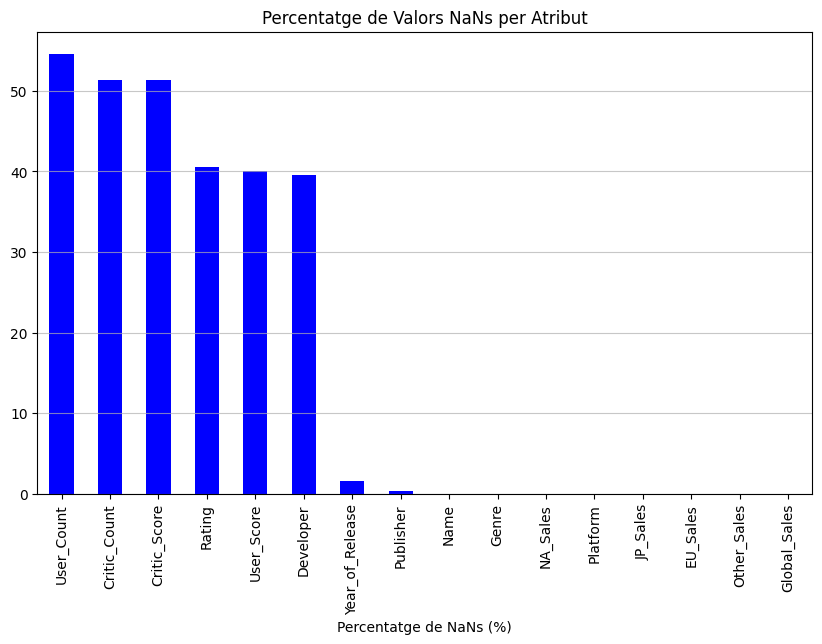

In [159]:
#Anàlisi de NaNs al dataset
def plot_nan_percentage(df):

    # Calcular el percentatge de valors NaN per cada atribut
    nan_percentage = (df.isnull().sum() / len(df)) * 100
    
    # Crear la gràfica
    plt.figure(figsize=(10, 6))
    nan_percentage.sort_values(ascending=False).plot(kind='bar', color='blue')
    plt.xlabel("Percentatge de NaNs (%)")
    plt.title("Percentatge de Valors NaNs per Atribut")
    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.show()

plot_nan_percentage(df)

<div style="text-align: justify;">
Com es pot veure a la gràfica, tenim un total de 8 atributs que contenen NaNs: 
<span style="color: #98FF98; font-weight: bold;">User_Count</span>, 
<span style="color: #98FF98; font-weight: bold;">Critic_Count</span>, 
<span style="color: #98FF98; font-weight: bold;">Critic_Score</span>, 
<span style="color: #98FF98; font-weight: bold;">Rating</span>, 
<span style="color: #98FF98; font-weight: bold;">User_Score</span>, 
<span style="color: #98FF98; font-weight: bold;">Developer</span>, 
<span style="color: #98FF98; font-weight: bold;">Year_of_Release</span> i 
<span style="color: #98FF98; font-weight: bold;">Publisher</span>.

A més, hi ha 2 atributs més que tenen NaNs, però en una proporció tant petita que no s'aprecia a la gràfica: 
<span style="color: #98FF98; font-weight: bold;">Name</span> i <span style="color: #98FF98; font-weight: bold;">Genre</span>. Aquests atributs tant sols tenen 2 mostres de les 16.719 mostres totals amb valors NaNs, el que representa un <span style="color: orange; font-weight: bold;">0.012%</span> de les mostres.

Tornant a la gràfica, podem observar com els atributs 
<span style="color: #98FF98; font-weight: bold;">Year_of_Release</span> i 
<span style="color: #98FF98; font-weight: bold;">Publisher</span> tenen un percentatge de NaNs inferior al <span style="color: orange; font-weight: bold;">2%</span>, els atributs 
<span style="color: #98FF98; font-weight: bold;">Rating</span>, 
<span style="color: #98FF98; font-weight: bold;">User_Score</span> i 
<span style="color: #98FF98; font-weight: bold;">Developer</span> ronden el <span style="color: red; font-weight: bold;">40%</span> de NaNs i, finalment, els atributs 
<span style="color: #98FF98; font-weight: bold;">User_Count</span>, 
<span style="color: #98FF98; font-weight: bold;">Critic_Count</span> i 
<span style="color: #98FF98; font-weight: bold;">Critic_Score</span> ronden el <span style="color: red; font-weight: bold;">50%</span> de valors NaNs. Més endavant veurem com tractem aquests NaNs, però abans continuarem analitzant altres característiques dels atributs.
</div>

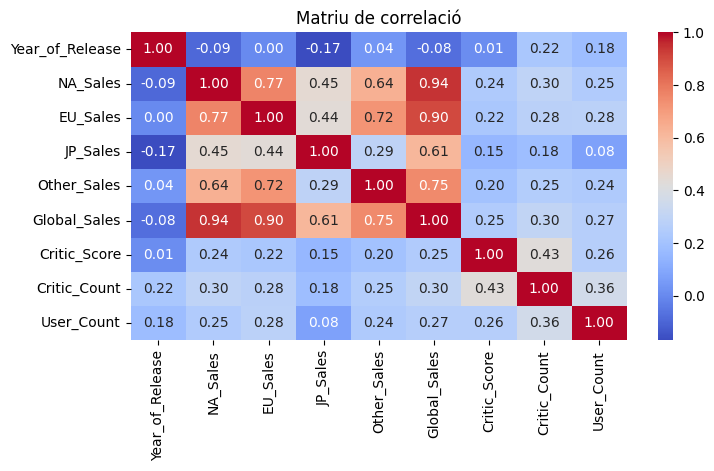

In [160]:

#Per tal de poder fer un primer anàlisi de correlacions, seleccionem les columnes numèriques 

columnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
df_nums = df[columnes_numeriques]

#I fem una matriu de correlació

plt.figure(figsize=(8, 4))
sns.heatmap(df_nums.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriu de correlació")
plt.show()


<div style="text-align: justify;">
En aquest primer anàlisi de correlacions, podem observar, per exemple, com el número de vendes d'un videojoc a Europa i a Amèrica del Nord té un gran pes en el número de vendes del videojoc a nivell global, a diferència de Japó, que tot i que les vendes del joc al seu territori tenen correlació amb les vendes a nivell global, aquesta força correlació es força més baixa a la dels dos territoris esmentats anteriorment, això ens fa pensar que existeix una diferència de gustos sobre videojocs a Japó respecte a Occident.

També, podem veure com les puntuacions que reben els videojocs per part de la crítica i del públic no tenen perquè significar que un viedojoc vengui més o menys, ja que la correlació entre les puntuacions i les vendes globals no supera el 30%. A més, seguint parlant sobre les puntuacions, podem veure com les valoracions que fa la crítica d'un videojoc no tenen perquè anar de la mà amb la opinió que els usuaris comuns tenen sobre ell, ja que la correlació es inferior al 50%.

Un cop fet aquest anàlisi de correlacions preliminar, toca fer l'anàlisi complet de la base de dades, incloent també les variables categòriques. M'ha cridat l'atenció aquesta diferència de vendes significativa d'un videojoc entre Occident i territori japonès, així que enfocaré l'anàlisi en trobar les raons que comporten aquesta diferència.
</div>

### **<span style="color:#EE82EE">PREPROCESSING</span>**
<div style="text-align: justify;">
En aquest apartat preparem la base de dades per tal de veure com afecten certs atributs a les vendes de videojocs a diferents territoris.<br>

<span style="color:#98FF98;">**ELIMINACIÓ D'ATRIBUTS**</span><br>
Començarem eliminant columnes que no ens seran necessàries per a la realització del nostre estudi del dataset: eliminarem la columna 'Name', ja que cada joc en té un de diferent i no ens serveix per fer cap anàlisi. A més la columna anys de llançament no ens serà necessària. Pel que fa a 'Publisher' la eliminem perquè conté moltes opcions diferents, més de 300, i 'Developer' la eliminem pel gran número de Nans que conté. Farem el mateix amb 'Rating', 'Critic_Count', 'Critic_Score', 'User_Count' i 'User_Score'.
</div>

In [161]:
#Atributs irrellavants

#Funció per eliminar atributs irrellevants

def eliminar_atributs(df, columnes_a_eliminar): 

    df_sense_atributs = df.drop(columns=columnes_a_eliminar, axis=1)
    return df_sense_atributs


atributs_a_eliminar = ['Name', 'Year_of_Release', 'Rating','Critic_Count','Critic_Score','User_Count','User_Score','Publisher','Developer']

df_sense_atributs = eliminar_atributs(df, atributs_a_eliminar)

#df_sense_atributs



<div style="text-align: justify;">
<span style="color:#98FF98;"><strong>CODIFICACIÓ</strong></span><br>
En aquest apartat he decidit agrupar atributs que són similars en un únic atribut. A l'apartat anterior hem eliminat les columnes 'publisher' i 'developer', doncs en aquest apartat recuperem part d'aquesta informació fent servir l'atribut 'platform'. He decidit agrupar les diferents plataformes per les companyies a la que pertanyen en l'atribut 'platform', reduïnt així considerablement el nombre d'elements de l'atribut i disposant ara d'un atribut que penso que pot ser rellevant per realitzar el nostre estudi.<br>

També, s'ha aplicat un Label Encoder a les variables categòriques 'genre' i 'company', aquesta última acabada de crear, assignant un valor numèric a les diferents opcions de cada atribut.<br>

Per útlim, s'ha definit un valor a partir del qual es considera que un videojoc ha venut bé a cada regió, les ventes mitjanes de videojocs de cada regió Fent servir aquests llindars s'han codificat de manera binària les ventes de videojocs a cada una de les regions de les que disposa informació el dataset. Com les ventes són les classes objectiu de l'anàlisi, necessitàvem queel resultat d'aquests atributs fos binari: "Ha venut bé" = '1', "No ha venut bé" = 0.

</div>

In [162]:
# Llistar plataformes úniques
unique_platforms = df['Platform'].unique()
#print("Llista de plataformes úniques:", unique_platforms)


#Codificació de les plataformes en funció de la companyia a la que pertanyen
def classify_platform(platform):
    # Diccionari de plataformes per companyia
    platform_dict = {
        'Nintendo': ['Wii', 'NES', 'GB', 'DS', 'GBA', '3DS', 'N64', 'WiiU', 'GC' ],
        'Sony': ['PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV'],
        #'Microsoft': ['X360', 'XB', 'XOne'],
        #'Atari': ['2600'],
        #'Sega': ['GEN','SAT', 'DC', 'SCD', 'GG'],
        #'PC': ['PC'],
        'Altres':['WS', 'PCFX', '3DO', 'TG16','X360', 'XB', 'XOne','2600','GEN','SAT', 'DC', 'SCD', 'GG','PC']
    }
    # Comprovar a quina companyia pertany la plataforma
    for company, platforms in platform_dict.items():
        if platform in platforms:
            return company
    return 'Altres'  # Si no es troba cap coincidència

# Aplicar la funció per classificar les plataformes
df_sense_atributs['Company'] = df_sense_atributs['Platform'].apply(classify_platform)

#df_sense_atributs


#Label Encoding a company i genre

# Crear instància de LabelEncoder
labels = LabelEncoder()

# Aplicar Label Encoding a les columnes "Company" i "Genre"
df_sense_atributs['Company_code'] = labels.fit_transform(df_sense_atributs['Company'])
df_sense_atributs['Genre_code'] = labels.fit_transform(df_sense_atributs['Genre'])

# Mostrar el DataFrame amb les noves columnes codificades
#print(df_sense_atributs)

# Definir un llindar per a les vendes "bones"
llindarNA = df_sense_atributs['NA_Sales'].mean()
llindarEU = df_sense_atributs['EU_Sales'].mean()
llindarJP = df_sense_atributs['JP_Sales'].mean()
llindarOthers = df_sense_atributs['Other_Sales'].mean()
llindarGlobal = df_sense_atributs['Global_Sales'].mean()

# Codificar les vendes com binàries (1 = bones vendes, 0 = males vendes)
for index, row in df_sense_atributs.iterrows():
    # Codificar Japó
    if row['JP_Sales'] >= llindarJP:
        df_sense_atributs.at[index, 'Japan_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'Japan_Ventes_Binaria'] = 0
    
    # Codificar Amèrica del Nord
    if row['NA_Sales'] >= llindarNA:
        df_sense_atributs.at[index, 'NA_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'NA_Ventes_Binaria'] = 0
    
    # Codificar Europa
    if row['EU_Sales'] >= llindarEU:
        df_sense_atributs.at[index, 'EU_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'EU_Ventes_Binaria'] = 0
    
    #Global
    if row['Global_Sales'] >= llindarGlobal:
        df_sense_atributs.at[index, 'Global_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'Global_Ventes_Binaria'] = 0
    
    # Codificar Altres territoris
    if row['Other_Sales'] >= llindarOthers:
        df_sense_atributs.at[index, 'Other_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'Other_Ventes_Binaria'] = 0


print(df_sense_atributs)



      Platform         Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0          Wii        Sports     41.36     28.96      3.77         8.45   
1          NES      Platform     29.08      3.58      6.81         0.77   
2          Wii        Racing     15.68     12.76      3.79         3.29   
3          Wii        Sports     15.61     10.93      3.28         2.95   
4           GB  Role-Playing     11.27      8.89     10.22         1.00   
...        ...           ...       ...       ...       ...          ...   
16714      PS3        Action      0.00      0.00      0.01         0.00   
16715     X360        Sports      0.00      0.01      0.00         0.00   
16716      PSV     Adventure      0.00      0.00      0.01         0.00   
16717      GBA      Platform      0.01      0.00      0.00         0.00   
16718      PSV    Simulation      0.00      0.00      0.01         0.00   

       Global_Sales   Company  Company_code  Genre_code  Japan_Ventes_Binaria  \
0             82.5


### **<span style="color:#EE82EE">ANÀLISI DE CORRELACIONS DESPRÉS DEL PREPROCESSING</span>**
En aquest apartat comprovem si els atributs 'company' i genre' tenen correlació amb les ventes dels videojocs a cada una de les regions.

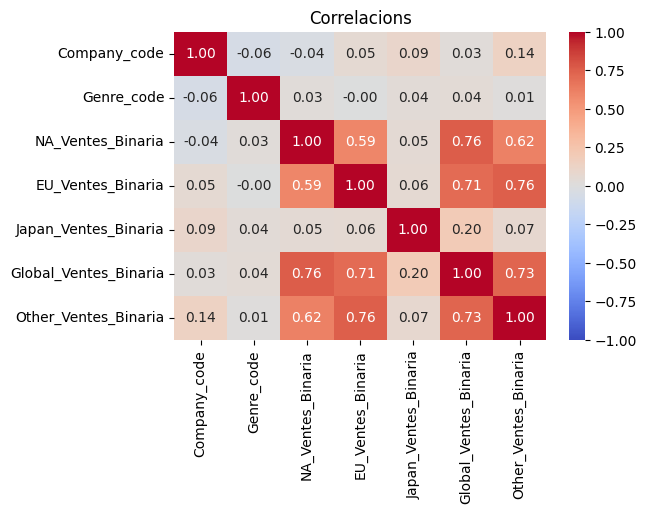

In [163]:

columnes_seleccionades = ['Company_code', 'Genre_code', 'NA_Ventes_Binaria', 'EU_Ventes_Binaria', 
                          'Japan_Ventes_Binaria', 'Global_Ventes_Binaria', 'Other_Ventes_Binaria']

# Crear un nou df
df_seleccionats = df_sense_atributs[columnes_seleccionades]

# Generar la matriu de correlació
plt.figure(figsize=(6, 4))
sns.heatmap(df_seleccionats.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlacions")
plt.show()



<div style="text-align: justify;">
Sorprenentment per mi, <span style="color: #98FF98; font-weight: bold;">no existeix una gran correlació entre la companyia fabricant de la consola a la que pertany el videojoc i el gènere del mateix amb si el joc ven bé o no a cada regió</span> . Això indica que no existeix una preferència dominant pel que fa a les companyies i als gèneres dels videojocs. Això és algo que no esperava i fa que m'hagi de replantejar el model, ja que no podem fer un model de predicció a partir d'atributs que no tenen correlació amb el resultat.
</div>

<div style="text-align: justify;">

### **<span style="color:#EE82EE">REPLANTEJAMENT DEL MODEL</span>**


Com la primera idea de model no és possible, <span style="color: #98FF98; font-weight: bold;">enfocaré el model en com afecta la puntuació de la crítica i els usuaris a les ventes a cada una de les regions</span>. Aquests atributs, com hem vist prèviament, sí tenen certa correlació amb el resultat, però volia evitar fer-los servir degut al gran nombre de NaNs que contenen. Però, ja que disposem d'un gran nombre d'instàncies a la base de dades, no hauria de ser un problema per realitzar un model de predicció.

</div>

<div style="text-align: justify;">

### **<span style="color:#EE82EE">PREPROCESSING</span>**
Com a preprocessing pel nou model, eliminem tots els atributs excepte 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'i els 5 atributs corresponents a les dades de ventes de videojocs a cada una de les 5 regions. Com aquests atributs contenien forces NaNs, eliminem totes les files que en continguin així com les files que contenen un valor 'tbd', que l'interpretem com un NaN.

</div>

In [164]:

atributs_a_eliminar = ['Name', 'Year_of_Release', 'Rating','Publisher','Developer',	'Platform','Genre', 'Rating']

df_sense_atributs = eliminar_atributs(df, atributs_a_eliminar)

df_sense_atributs.replace('tbd', np.nan, inplace=True)
df_sense_atributs.dropna(subset=df_sense_atributs.columns, inplace=True)




<div style="text-align: justify;">

### **<span style="color:#EE82EE">ANÀLISI DE MÈTRIQUES</span>**
En aquest apartat determinem a partir de quin valor es considera que un joc ha venut bé i fem un anàlisi del rendiment del model de predicció. Analitzem les mètriques 'Precision', 'Recall', 'Accuracy' 'F1-score' i 'support' incloses a 'Classification_report'.

A l'analitzar els resultats obtinguts, es pot veure que el model funciona bé per a predir classes negatives però té problemes a l'hora de predir quan un joc vendrà bé. Això es pot deure a que les classes 'target' estan desbalancejades, així com a falta d'atributs que ajudin a fer aquesta predicció. Tot i això, intentarem millorar el rendiment del sistema.

</div>

Evaluació per a NA_Ventes_Binaria:
F1 mitjà amb k=10: 0.4335
--------------------------------------------------


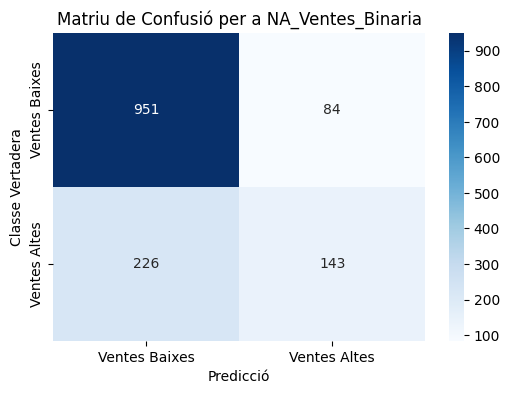

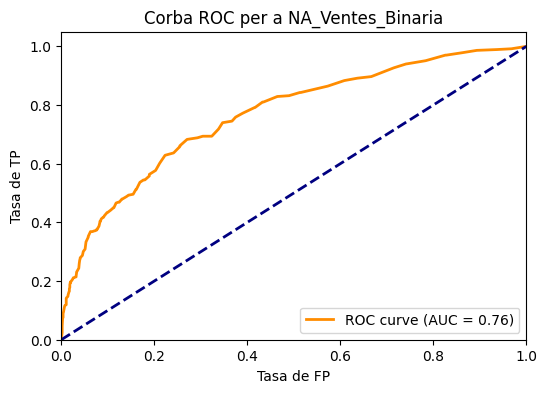

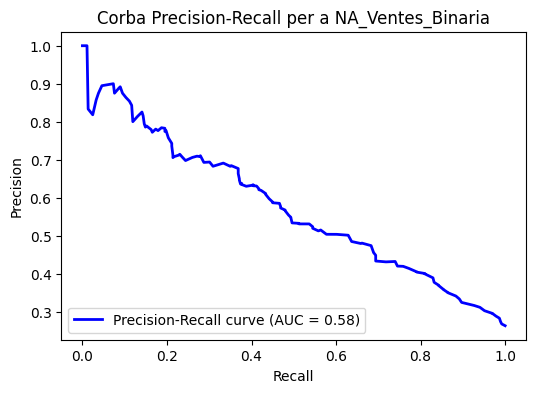

Report de classificació per a NA_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1035
         1.0       0.63      0.39      0.48       369

    accuracy                           0.78      1404
   macro avg       0.72      0.65      0.67      1404
weighted avg       0.76      0.78      0.76      1404

--------------------------------------------------
Evaluació per a EU_Ventes_Binaria:
F1 mitjà amb k=10: 0.4488
--------------------------------------------------


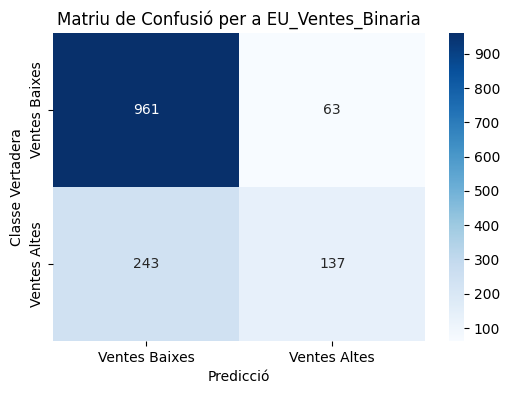

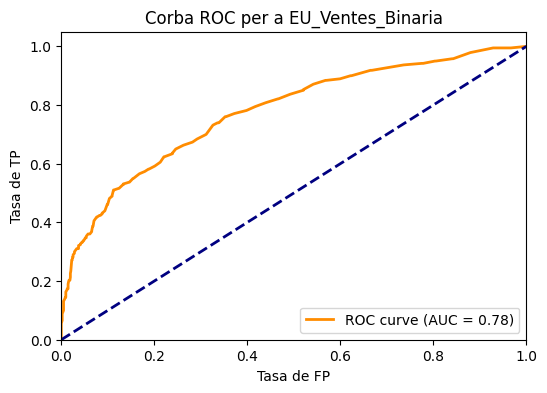

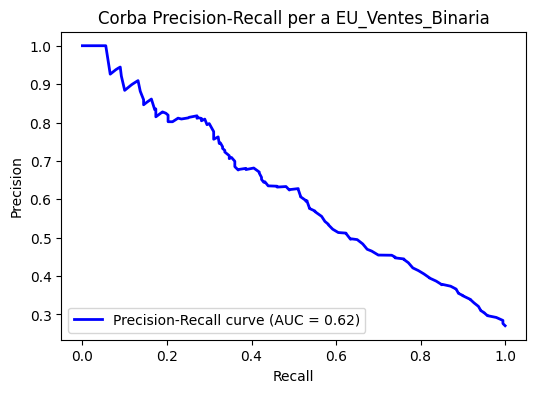

Report de classificació per a EU_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      1024
         1.0       0.69      0.36      0.47       380

    accuracy                           0.78      1404
   macro avg       0.74      0.65      0.67      1404
weighted avg       0.77      0.78      0.76      1404

--------------------------------------------------
Evaluació per a Japan_Ventes_Binaria:
F1 mitjà amb k=10: 0.4893
--------------------------------------------------


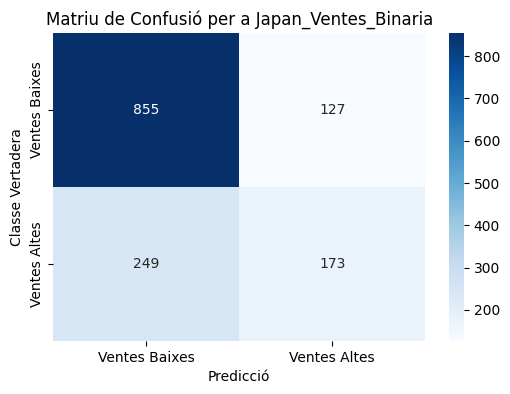

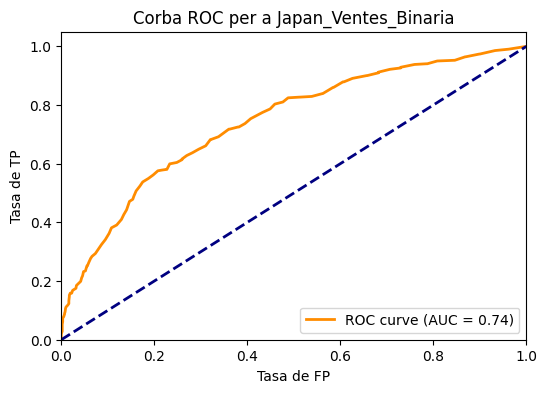

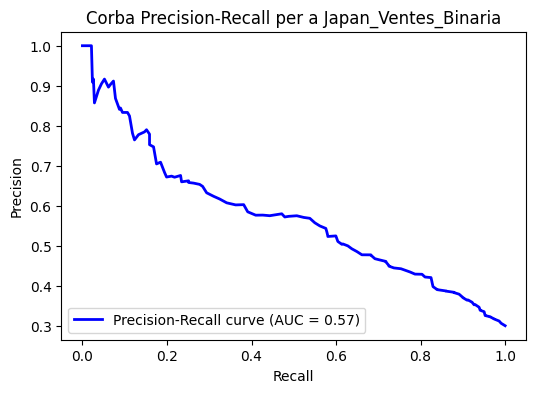

Report de classificació per a Japan_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       982
         1.0       0.58      0.41      0.48       422

    accuracy                           0.73      1404
   macro avg       0.68      0.64      0.65      1404
weighted avg       0.72      0.73      0.72      1404

--------------------------------------------------
Evaluació per a Global_Ventes_Binaria:
F1 mitjà amb k=10: 0.4625
--------------------------------------------------


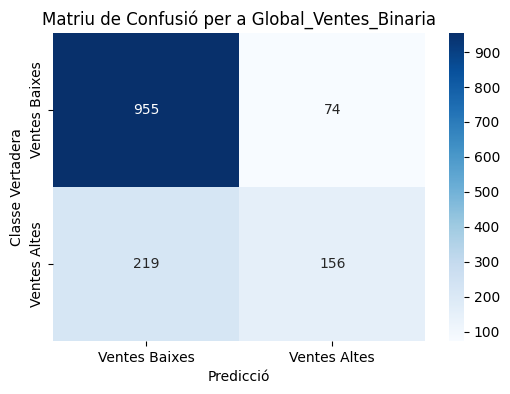

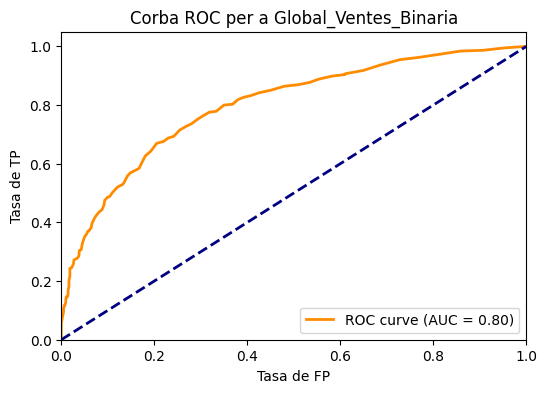

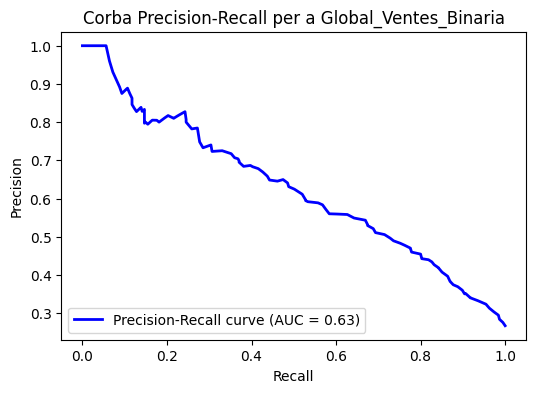

Report de classificació per a Global_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1029
         1.0       0.68      0.42      0.52       375

    accuracy                           0.79      1404
   macro avg       0.75      0.67      0.69      1404
weighted avg       0.78      0.79      0.77      1404

--------------------------------------------------
Evaluació per a Other_Ventes_Binaria:
F1 mitjà amb k=10: 0.4523
--------------------------------------------------


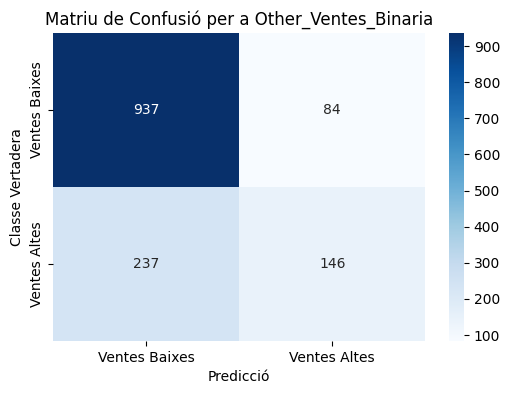

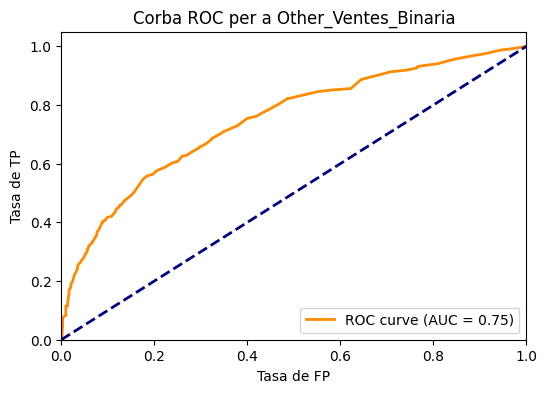

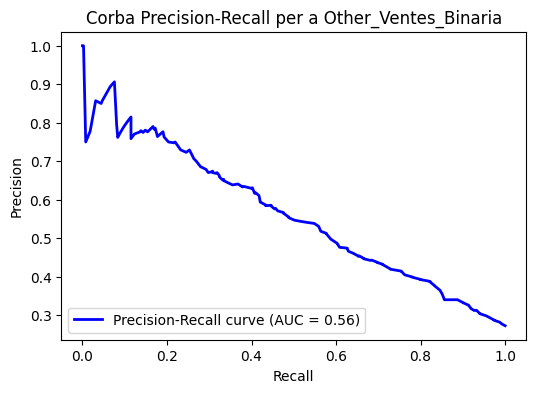

Report de classificació per a Other_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85      1021
         1.0       0.63      0.38      0.48       383

    accuracy                           0.77      1404
   macro avg       0.72      0.65      0.67      1404
weighted avg       0.75      0.77      0.75      1404

--------------------------------------------------


In [165]:
scaler = MinMaxScaler()
df_sense_atributs[['Critic_Score', 'User_Score', 'Critic_Count','User_Count']] = scaler.fit_transform(df_sense_atributs[['Critic_Score', 'User_Score', 'Critic_Count','User_Count']])

percentil_global = df_sense_atributs['Global_Sales'].quantile(0.75)
percentil_EU = df_sense_atributs['EU_Sales'].quantile(0.75)
percentil_JP = df_sense_atributs['JP_Sales'].quantile(0.75)
percentil_NA = df_sense_atributs['NA_Sales'].quantile(0.75)
percentil_Other = df_sense_atributs['Other_Sales'].quantile(0.75)


for index, row in df_sense_atributs.iterrows():
    df_sense_atributs.at[index, 'Japan_Ventes_Binaria'] = 1 if row['JP_Sales'] >= percentil_JP else 0
    df_sense_atributs.at[index, 'NA_Ventes_Binaria'] = 1 if row['NA_Sales'] >= percentil_NA else 0
    df_sense_atributs.at[index, 'EU_Ventes_Binaria'] = 1 if row['EU_Sales'] >= percentil_EU else 0
    df_sense_atributs.at[index, 'Global_Ventes_Binaria'] = 1 if row['Global_Sales'] >= percentil_global else 0
    df_sense_atributs.at[index, 'Other_Ventes_Binaria'] = 1 if row['Other_Sales'] >= percentil_Other else 0


target_columns = ['NA_Ventes_Binaria', 'EU_Ventes_Binaria', 'Japan_Ventes_Binaria', 'Global_Ventes_Binaria', 'Other_Ventes_Binaria']

k = 10
for target in target_columns:
    
    # Preparar les característiques (X) i l'objectiu (y)
    X = df_sense_atributs[['Critic_Score', 'User_Score','Critic_Count','User_Count']]  
    y = df_sense_atributs[target] 

    # Dividir en conjunt d'entrenament i test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model RandomForest
    model = RandomForestClassifier(random_state=42)
    
    # Validació creuada
    cv_results = cross_validate(model, X_train, y_train, cv=k, scoring='f1', return_estimator=True)

    # Mostrar resultats de la validació creuada
    print(f"Evaluació per a {target}:")
    print(f"F1 mitjà amb k={k}: {cv_results['test_score'].mean():.4f}")
    print("-" * 50)

    # Seleccionar el millor model (basat en el F1 score de la validació creuada)
    best_model = cv_results['estimator'][np.argmax(cv_results['test_score'])]

    # Fer prediccions amb el millor model seleccionat sobre les dades de test
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  

    # Matriu de confusió
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ventes Baixes', 'Ventes Altes'], yticklabels=['Ventes Baixes', 'Ventes Altes'])
    plt.title(f"Matriu de Confusió per a {target}")
    plt.ylabel('Classe Vertadera')
    plt.xlabel('Predicció')
    plt.show()

    # Corba ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de FP')
    plt.ylabel('Tasa de TP')
    plt.title(f'Corba ROC per a {target}')
    plt.legend(loc='lower right')
    plt.show()

    # Corba Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Corba Precision-Recall per a {target}')
    plt.legend(loc='lower left')
    plt.show()

    # Report de classificació
    print(f"Report de classificació per a {target}:")
    print(classification_report(y_test, y_pred)) 
    print("-" * 50)

<div style="text-align: justify;">

### **<span style="color:#EE82EE">CROSS-VALIDATION I SELECCIÓ DE MODELS</span>**
    
En aquest apartat compararem el rendiment de tres models de predicció amb el <span style="color:#228B22; font-weight:bold;">Random Forest</span> que ja hem utilitzat. Per a fer-ho, aplicarem la tècnica de <span style="font-style:italic;">Cross-Validation</span> a cadascun dels següents models: 
<span style="color:#228B22; font-weight:bold;">KNN</span>, 
<span style="color:#228B22; font-weight:bold;">Random Forest</span>, 
<span style="color:#228B22; font-weight:bold;">Regressió Lineal</span> 
i <span style="color:#228B22; font-weight:bold;">Support Vector Machine</span>.
    
Escollirem el valor de <span style="font-weight:bold;">k</span> en funció de la millor <span style="font-weight:bold;">k</span> obtinguda pel <span style="color:#228B22; font-weight:bold;">Random Forest</span> en funció de la mètrica <span style="color:#228B22; font-weight:bold;">f1-score</span>, 
i utilitzarem aquest valor per a totes les proves.

</div>

    k   mean_f1    std_f1
0   3  0.428073  0.085689
1   5  0.442612  0.113384
2   7  0.458409  0.094750
3  10  0.469018  0.101937
4  15  0.464133  0.108132
5  20  0.474423  0.105715
6  22  0.472836  0.116412
7  30  0.474709  0.112602
El millor valor de k és 30.0 amb un F1 promig de 0.47470932198412374


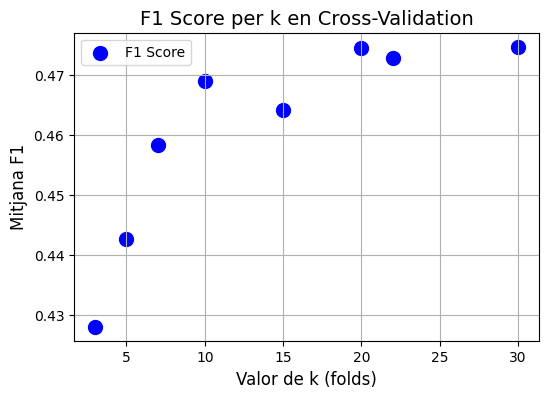

In [166]:

# Trobar la millor k pel cross validation
k_values = [3, 5, 7, 10, 15, 20, 22, 30]

results = []
target = 'Global_Ventes_Binaria'
model = RandomForestClassifier()

X = df_sense_atributs[['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']]
y = df_sense_atributs[target]


for k in k_values:
    cv_scores = cross_val_score(model, X, y, cv=k, scoring='f1')
    
    results.append({'k': k, 'mean_f1': np.mean(cv_scores), 'std_f1': np.std(cv_scores)})

results_df = pd.DataFrame(results)


print(results_df)

# Trobar el millor k
best_k = results_df.loc[results_df['mean_f1'].idxmax()]
print(f"El millor valor de k és {best_k['k']} amb un F1 promig de {best_k['mean_f1']}")

# Gràfica
plt.figure(figsize=(6, 4))
plt.scatter(results_df['k'], results_df['mean_f1'], color='b', label='F1 Score', s=100) 
plt.title('F1 Score per k en Cross-Validation', fontsize=14)
plt.xlabel('Valor de k (folds)', fontsize=12)
plt.ylabel('Mitjana F1', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Com es pot veure a la gràfica, la millor opció de <span style="font-weight:bold;">k</span> és 30, o 20 depenen de la execució. 
Però com la diferència respecte a 10 no és molt significativa, ens quedem amb aquesta última opció per tenir un bon equilibri entre rendiment i temps d'execució.
       
Un cop seleccionada la <span style="font-weight:bold;">k</span> pel <span style="font-style:italic;">k-fold Cross-Validation</span>, anem a aplicar-la a cada model amb els paràmetres per defecte per veure quin és la millor opció.

Avaluant per al target: NA_Ventes_Binaria
Target: NA_Ventes_Binaria
Model: Logistic Regression
Train Accuracy: 0.7898
Train Precision: 0.6889
Train Recall: 0.2730
Train F1: 0.3898
--------------------------------------------------
Target: NA_Ventes_Binaria
Model: Random Forest
Train Accuracy: 0.7753
Train Precision: 0.5732
Train Recall: 0.3537
Train F1: 0.4370
--------------------------------------------------
Target: NA_Ventes_Binaria
Model: KNN
Train Accuracy: 0.7618
Train Precision: 0.5297
Train Recall: 0.3278
Train F1: 0.4041
--------------------------------------------------
Target: NA_Ventes_Binaria
Model: SVM
Train Accuracy: 0.7848
Train Precision: 0.7628
Train Recall: 0.1880
Train F1: 0.3011
--------------------------------------------------
Avaluant per al target: EU_Ventes_Binaria
Target: EU_Ventes_Binaria
Model: Logistic Regression
Train Accuracy: 0.8005
Train Precision: 0.7419
Train Recall: 0.2892
Train F1: 0.4154
--------------------------------------------------
Target: E

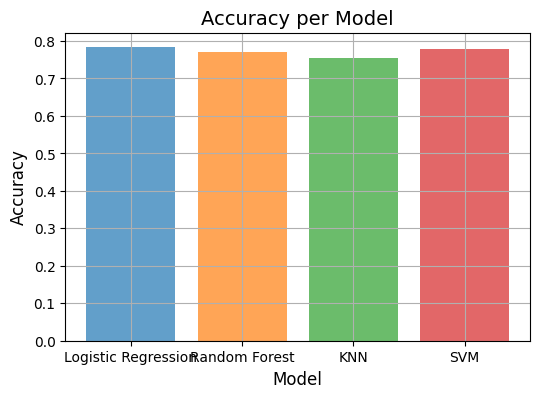

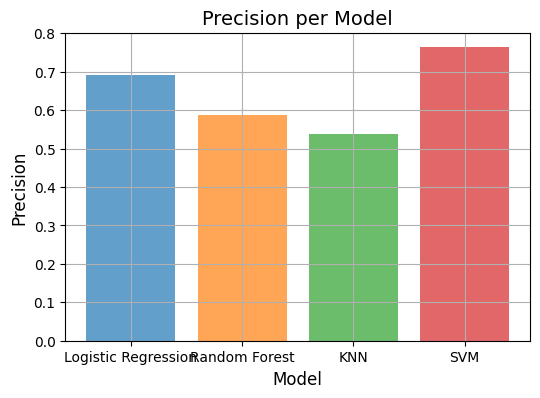

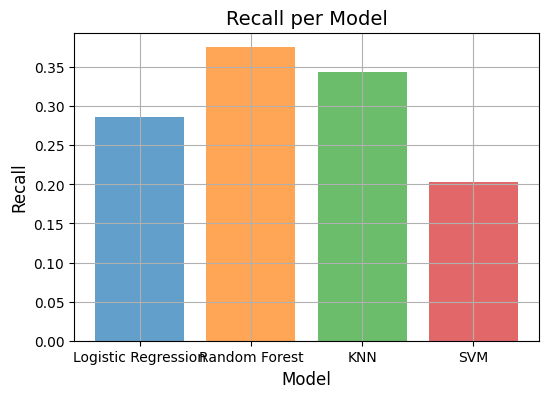

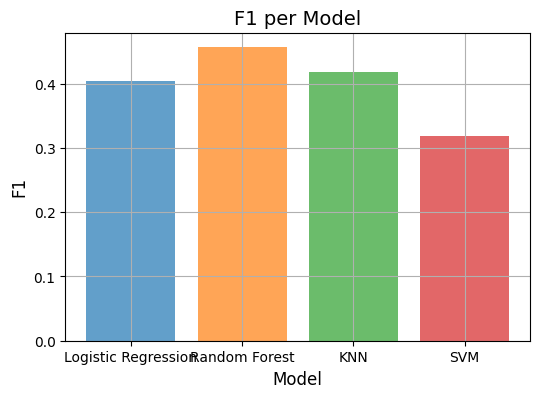

In [167]:
#Prova d'altres models i cross-validation (hiperparàmetres per defecte)

# Mètriques a avaluar
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Llista de resultats
resultat = []

# Columnes target
target_columns = ['NA_Ventes_Binaria', 'EU_Ventes_Binaria', 'Japan_Ventes_Binaria', 'Global_Ventes_Binaria', 'Other_Ventes_Binaria']

# Modells a avaluar
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
]

# Preparació per a les gràfiques
metrics = ['accuracy', 'precision', 'recall', 'f1']
models_names = [name for name, _ in models]

# diccionari per emmagatzemar els resultats de les mètriques per a cada model
model_metrics = {metric: {model_name: [] for model_name, _ in models} for metric in metrics}


for target in target_columns:
    print(f"Avaluant per al target: {target}")
    
    
    X = df_sense_atributs[['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']]
    y = df_sense_atributs[target]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Avaluar cada model amb cross-validation
    k = 10
    for model_name, model in models:
        
        cv_results = cross_validate(model, X_train, y_train, cv=k, scoring=scoring)
        
        
        resultat.append({
            'Target': target,
            'Model': model_name,
            'Train Accuracy': cv_results['test_accuracy'].mean(),
            'Train Precision': cv_results['test_precision'].mean(),
            'Train Recall': cv_results['test_recall'].mean(),
            'Train F1': cv_results['test_f1'].mean()
        })

        for metric in metrics:
            model_metrics[metric][model_name].append(cv_results[f'test_{metric}'].mean())

        print(f"Target: {target}")
        print(f"Model: {model_name}")
        print(f"Train Accuracy: {cv_results['test_accuracy'].mean():.4f}")
        print(f"Train Precision: {cv_results['test_precision'].mean():.4f}")
        print(f"Train Recall: {cv_results['test_recall'].mean():.4f}")
        print(f"Train F1: {cv_results['test_f1'].mean():.4f}")
        print("-" * 50)


results_df = pd.DataFrame(resultat)

for metric in metrics:
    plt.figure(figsize=(6, 4))
    for model_name in models_names:
        plt.bar(model_name, np.mean(model_metrics[metric][model_name]), label=model_name, alpha=0.7)
    
    plt.title(f'{metric.capitalize()} per Model', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(f'{metric.capitalize()}', fontsize=12)
    plt.grid(True)
    plt.show()


#print("Resultats:")
#print(results_df)

<div style="text-align: justify;">
    Si analitzem les gràfiques de les mètriques en funció dels models, podem extreure diverses conclusions:
    <ul>
        <li><span style="color:green;"><b>Accuracy</b></span>: Tots els models mostren un <span style="color:green;"><b>accuracy</b></span> bastant bo.</li>
        <li><span style="color:green;"><b>Precision</b></span> i <span style="color:green;"><b>Recall</b></span>: Els models <span style="color:green;"><b>SVM</b></span> i <span style="color:green;"><b>Regressió Lineal</b></span> tenen les <span style="color:green;"><b>precisions</b></span> més altes, però això ve acompanyat d'un <span style="color:green;"><b>recall</b></span> més baix.</li>
        <li><span style="color:green;"><b>Equilibri entre Precision i Recall</b></span>: Els models amb un millor equilibri entre <span style="color:green;"><b>precisió</b></span> i <span style="color:green;"><b>recall</b></span> són <span style="color:green;"><b>Random Forest</b></span> i <span style="color:green;"><b>KNN</b></span>.</li>
    </ul>
    A causa d'aquestes raons, em decanto per <span style="color:green;"><b>Random Forest</b></span> i <span style="color:green;"><b>KNN</b></span> com a models amb els que seguiré treballant.
</div>

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
    
### **<span style="color:#EE82EE">SELECCIÓ D'HIPERPARÀMETRES</span>**
    
Un cop seleccionats els models, buscarem els millors hiperparàmetres per a cadascun d'ells. Treballarem amb la mètrica <span style="font-weight:bold; color:green;">'f1-score'</span> i utilitzarem el target <span style="font-weight:bold; color:green;">'Global_Sales'</span> , ja que, en cas de fer l'anàlisi amb tots els targets, el temps d'execució seria massa llarg.

</div>


In [ ]:
#Tria d'hiperparàmetres 


# Hiperparàmetres per a cada model

rForest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

knn = {
    'n_neighbors': [2, 5, 7, 10, 15, 22, 30],
    'weights': ['uniform', 'distance']
}



# Llista de models amb els seus respectius hiperparams
models_with_params = [
    ('Random Forest', RandomForestClassifier(), rForest),
    ('KNN', KNeighborsClassifier(), knn)
]

# Targets
#target_columns = ['NA_Ventes_Binaria', 'EU_Ventes_Binaria', 'Japan_Ventes_Binaria', 'Global_Ventes_Binaria', 'Other_Ventes_Binaria']
target_columns = ['Global_Ventes_Binaria']

#Llista de resultats
best_results = []

k = 3 #Baixo la k per disminuir el temps d'execució, pero les proves les he realitzat amb k = 10

scoring = { #mètriques
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Funció per a ajustar models i obtenir resultats
def fit_model_and_collect_best_params(model, param_grid, model_name, X_train, y_train, target):
    grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='f1', cv=k)
    grid_search.fit(X_train, y_train)


    best_params = grid_search.best_params_
    best_index = grid_search.best_index_


    best_result = {
        'Target': target,
        'Model': model_name,
        'Best Params': best_params,
        'Best Accuracy': grid_search.cv_results_['mean_test_accuracy'][best_index],
        'Best Precision': grid_search.cv_results_['mean_test_precision'][best_index],
        'Best Recall': grid_search.cv_results_['mean_test_recall'][best_index],
        'Best F1': grid_search.cv_results_['mean_test_f1'][best_index],
        'Std F1': grid_search.cv_results_['std_test_f1'][best_index],

    }
    return best_result


for target in target_columns:
    print(f"\nAvaluant: {target}")
    

    X = df_sense_atributs[['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']]
    y = df_sense_atributs[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    for model_name, model, param_grid in models_with_params:
        result = fit_model_and_collect_best_params(model, param_grid, model_name, X_train, y_train, target)
        best_results.append(result)


best_results_df = pd.DataFrame(best_results)

print("\nMillors resultats:")
print(best_results_df)



Avaluant: Global_Ventes_Binaria

Millors resultats:
                  Target          Model  \
0  Global_Ventes_Binaria  Random Forest   
1  Global_Ventes_Binaria            KNN   

                                 Best Params  Best Accuracy  Best Precision  \
0   {'max_depth': None, 'n_estimators': 200}       0.783356        0.592648   
1  {'n_neighbors': 7, 'weights': 'distance'}       0.768395        0.546833   

   Best Recall   Best F1    Std F1  
0     0.379710  0.462409  0.036703  
1     0.347101  0.424352  0.022930  


<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
    
Un cop tenim els resultats per als millors hiperparàmetres tant per <span style="font-weight:bold; color:green;">KNN</span> com per <span style="font-weight:bold; color:green;">Random Forest</span>, decideixo que <span style="font-weight:bold; color:green;">Random Forest</span> és la millor opció. Els hiperparàmetres varien una mica en funció de la execució, però una combinació que es repeteix força sovint i amb la que em quedo és: <span style="font-weight:bold; color:green;">max_depth=20</span>, <span style="font-weight:bold; color:green;">n_estimators=100</span>.
    
</div>


<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
    
### **<span style="color:#EE82EE">PREDIR AMB EL MODEL, VALOR DE K DEL CV I HIPERPARÀMETRES SELECCIONATS</span>**
    
Ja tenim decidit el millor model, <span style="font-weight:bold; color:green;">Random Forest</span>, els millors hiperparàmetres, <span style="font-weight:bold; color:green;">max_depth=20</span>, <span style="font-weight:bold; color:green;">n_estimators=100</span> i el millor valor de k pel K-Fold CV<span style="font-weight:bold; color:green;"> k = 10</span>. Ara toca veure quins resultats dona aquesta combinació.

</div>


Evaluació per a NA_Ventes_Binaria:
F1 mitjà amb k=10: 0.4340
--------------------------------------------------


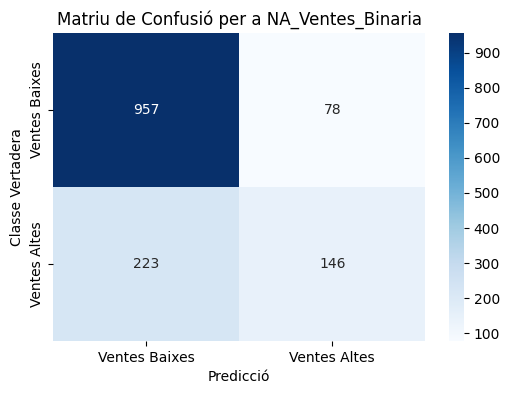

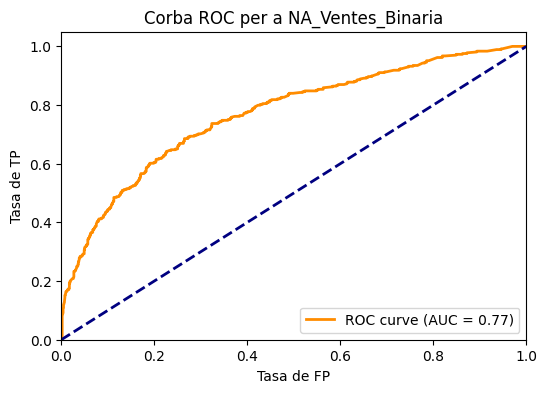

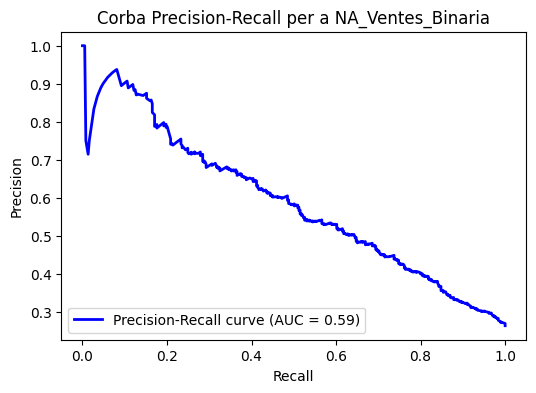

Report de classificació per a NA_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1035
         1.0       0.65      0.40      0.49       369

    accuracy                           0.79      1404
   macro avg       0.73      0.66      0.68      1404
weighted avg       0.77      0.79      0.77      1404

--------------------------------------------------
Evaluació per a EU_Ventes_Binaria:
F1 mitjà amb k=10: 0.4468
--------------------------------------------------


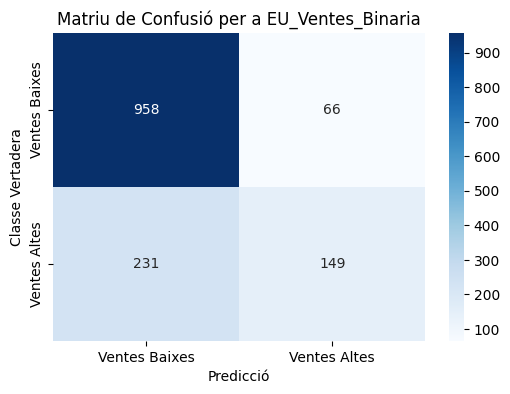

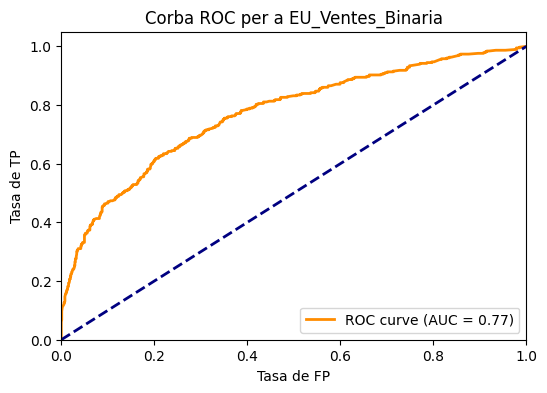

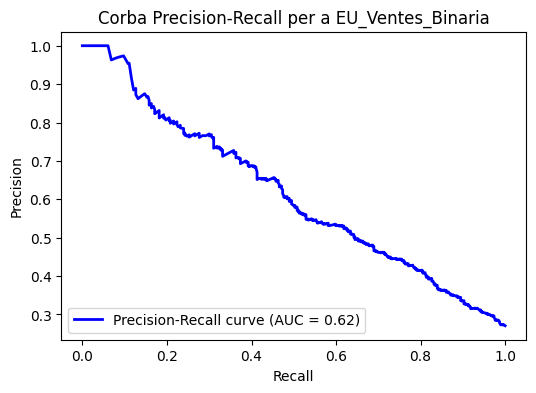

Report de classificació per a EU_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1024
         1.0       0.69      0.39      0.50       380

    accuracy                           0.79      1404
   macro avg       0.75      0.66      0.68      1404
weighted avg       0.78      0.79      0.77      1404

--------------------------------------------------
Evaluació per a Japan_Ventes_Binaria:
F1 mitjà amb k=10: 0.4812
--------------------------------------------------


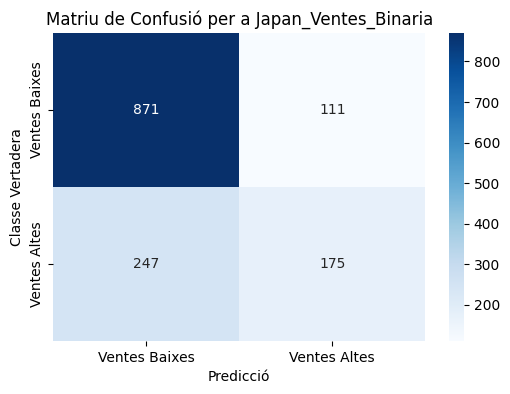

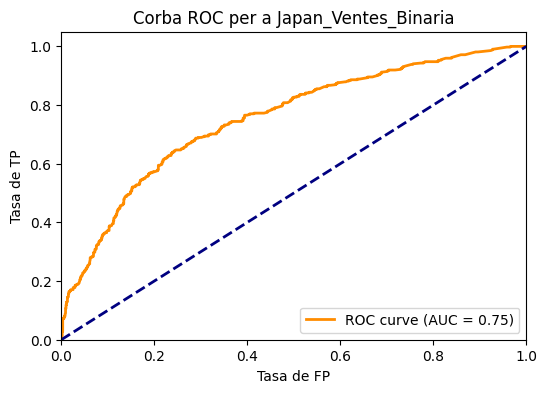

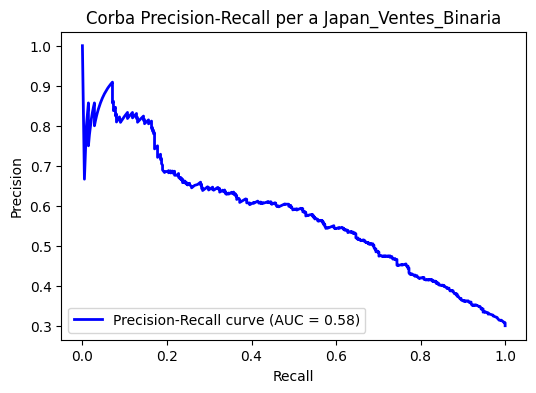

Report de classificació per a Japan_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       982
         1.0       0.61      0.41      0.49       422

    accuracy                           0.75      1404
   macro avg       0.70      0.65      0.66      1404
weighted avg       0.73      0.75      0.73      1404

--------------------------------------------------
Evaluació per a Global_Ventes_Binaria:
F1 mitjà amb k=10: 0.4639
--------------------------------------------------


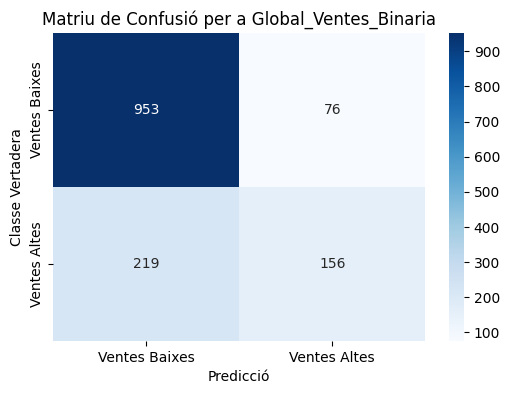

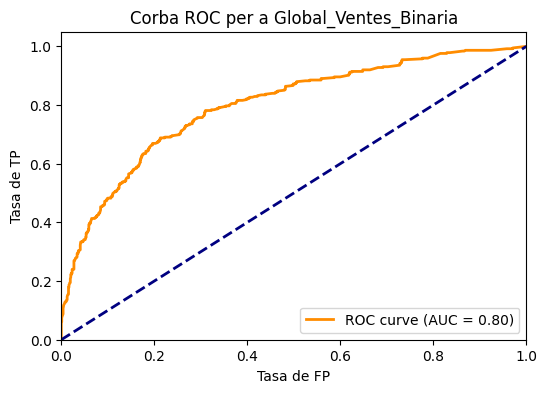

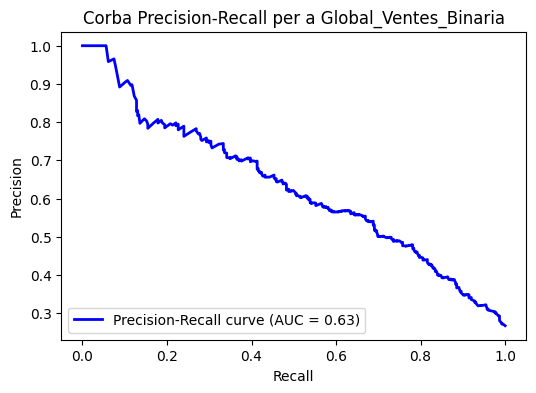

Report de classificació per a Global_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1029
         1.0       0.67      0.42      0.51       375

    accuracy                           0.79      1404
   macro avg       0.74      0.67      0.69      1404
weighted avg       0.78      0.79      0.77      1404

--------------------------------------------------
Evaluació per a Other_Ventes_Binaria:
F1 mitjà amb k=10: 0.4530
--------------------------------------------------


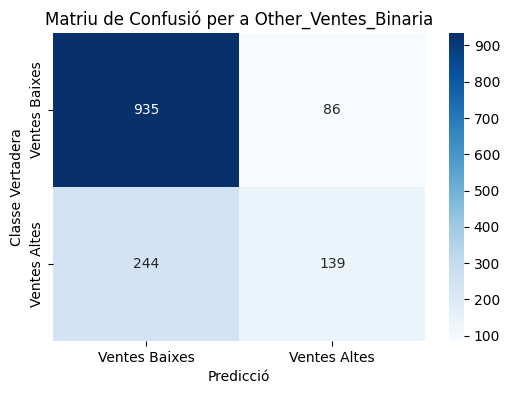

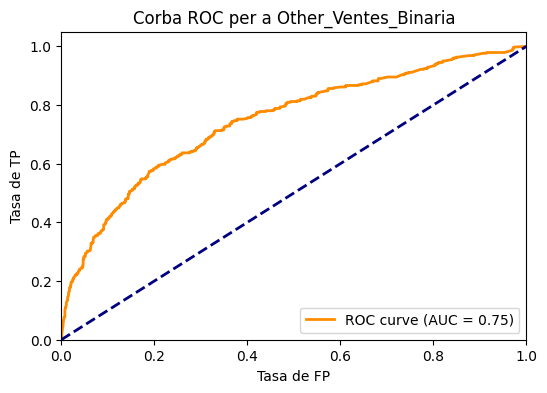

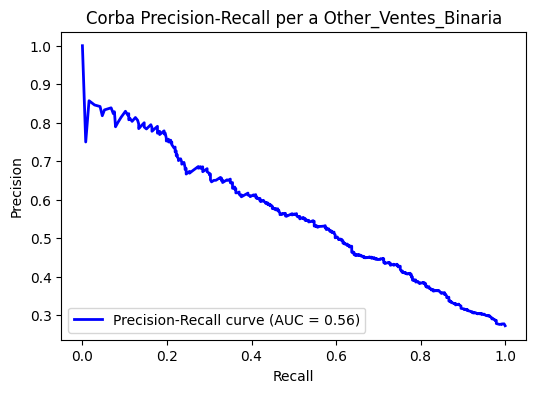

Report de classificació per a Other_Ventes_Binaria:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      1021
         1.0       0.62      0.36      0.46       383

    accuracy                           0.76      1404
   macro avg       0.71      0.64      0.65      1404
weighted avg       0.75      0.76      0.74      1404

--------------------------------------------------


In [169]:
target_columns = ['NA_Ventes_Binaria', 'EU_Ventes_Binaria', 'Japan_Ventes_Binaria', 'Global_Ventes_Binaria', 'Other_Ventes_Binaria']

k = 10
for target in target_columns:
    
    # Preparar les característiques (X) i l'objectiu (y)
    X = df_sense_atributs[['Critic_Score', 'User_Score','Critic_Count','User_Count']]  
    y = df_sense_atributs[target] 

    # Dividir en conjunt d'entrenament i test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model RandomForest
    model = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
    
    # Validació creuada
    cv_results = cross_validate(model, X_train, y_train, cv=k, scoring='f1', return_estimator=True)

    # Mostrar resultats de la validació creuada
    print(f"Evaluació per a {target}:")
    print(f"F1 mitjà amb k={k}: {cv_results['test_score'].mean():.4f}")
    print("-" * 50)

    # Seleccionar el millor model (basat en el F1 score de la validació creuada)
    best_model = cv_results['estimator'][np.argmax(cv_results['test_score'])]

    # Fer prediccions amb el millor model seleccionat sobre les dades de test
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  

    # Matriu de confusió
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ventes Baixes', 'Ventes Altes'], yticklabels=['Ventes Baixes', 'Ventes Altes'])
    plt.title(f"Matriu de Confusió per a {target}")
    plt.ylabel('Classe Vertadera')
    plt.xlabel('Predicció')
    plt.show()

    # Corba ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de FP')
    plt.ylabel('Tasa de TP')
    plt.title(f'Corba ROC per a {target}')
    plt.legend(loc='lower right')
    plt.show()

    # Corba Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Corba Precision-Recall per a {target}')
    plt.legend(loc='lower left')
    plt.show()

    # Report de classificació
    print(f"Report de classificació per a {target}:")
    print(classification_report(y_test, y_pred)) 
    print("-" * 50)

<div style="text-align: justify;">

### **<span style="color:#EE82EE">ANÀLISI DE RESULTATS</span>**

**Ventes globals:**
- **Paràmetres per defecte:**  
    - ROC curve AUC = 0.80  
    - PR curve AUC = 0.63  
- **Paràmetres personalitzats:**  
    - ROC curve AUC = 0.80  
    - PR curve AUC = 0.63  

**Ventes a Europa:**
- **Paràmetres per defecte:**  
    - ROC curve AUC = 0.78  
    - PR curve AUC = 0.62  
- **Paràmetres personalitzats:**  
    - ROC curve AUC = 0.77  
    - PR curve AUC = 0.62  

**Ventes al Japó:**
- **Paràmetres per defecte:**  
    - ROC curve AUC = 0.74  
    - PR curve AUC = 0.57  
- **Paràmetres personalitzats:**  
    - ROC curve AUC = 0.75  
    - PR curve AUC = 0.58  

**Ventes a Amèrica:**
- **Paràmetres per defecte:**  
    - ROC curve AUC = 0.76  
    - PR curve AUC = 0.58  
- **Paràmetres personalitzats:**  
    - ROC curve AUC = 0.76  
    - PR curve AUC = 0.58  

**Ventes a altres regions:**
- **Paràmetres per defecte:**  
    - ROC curve AUC = 0.75  
    - PR curve AUC = 0.56  
- **Paràmetres personalitzats:**  
    - ROC curve AUC = 0.75  
    - PR curve AUC = 0.56  

Com podem observar, la selecció dels millors hiperparàmetres no ha influït de manera significativa en el rendiment del nostre model. A més, ja havíem escollit el model Random Forest des del principi, així com un valor de k adequat pel K-Fold Cross-Validation, de manera que des de l'inici el model estava rendint al màxim de les seves possibilitats en aquests aspectes.


</div>

<div style="text-align: justify;">

### **<span style="color:#EE82EE">CONCLUSIONS</span>**
    
Haver treballat amb aquest dataset m'ha servit per continuar aprenent sobre aquesta branca de la informàtica,  aprofuntint en l'anàlisi de dades i els models predictius. A més, també m'ha aportat cultura general, ja que inicialment pensava que la plataforma a la qual pertany un videojoc i el seu gènere eren factors clau que influïen de manera significativa en el nombre de ventes, però al realitzar l'anàlisi de correlacions he vist que això no sembla ser així. Això ha comportat que hagi de replantejar-me els meus objectius i, finalment, he treballat amb la influència de les puntuacions de la crítica i dels usuaris en l'èxit comercial d'un joc, creant un model predictiu al respecte. Aquest model funciona bé per predir si un joc tindrà poques ventes, però, malauradament, no és fiable per predir si un joc serà un èxit comercial.

Luis Vera.

</div>